In [1]:
from roulette import Roulette
from core import *
import random
from simulations_core import simulate_different_goal_money
from simulations_plots_core import plot_money_histories

roulette = Roulette()

In [2]:
def split_money(money):
    pieces = []
    while money != 0:
        if money>=10:
            portion = random.randint(2, 10)
            money -= portion
            pieces.append(portion)
        else:
            pieces.append(money)
            money = 0
            
    return pieces

In [3]:
def labouchere_betting(goal_money_won):
    bets = split_money(goal_money_won)
    money_history = []
    money = 0
    while money < goal_money_won:
        prev_money = money 
        if len(bets) == 1:
            bet = bets[0]
        else:
            bet = bets[0] + bets[-1]
        money += roulette.make_even_bet(bet)
        money_history.append(money)
        if money < prev_money:
            if len(bets) == 1 or len(bets) == 2:
                return money_history
            else:
                bets.pop(0)
                bets.pop()
    
    return money_history

In [4]:
money_histories = simulate_different_goal_money(
                    betting_type = labouchere_betting, 
                    goal_money_list = [10, 100, 500, 1000], 
                    number_histories = 1000)


In [5]:
def plot_successful_bets(money_histories, goal, title='Successful bets'):
    num_bets = ['Successful' if money_history[-1] >= goal else 'Unsuccessful' for money_history in money_histories]
    plt.hist(num_bets)
    plt.title(title)
    plt.show()

In [6]:
successful_histories = dict()
for goal in [10, 100, 500, 1000]:
    successful_histories[goal] = [money_history for money_history in money_histories[goal] if money_history[-1] >= goal]

## Analysis when the goal is to win 10 units

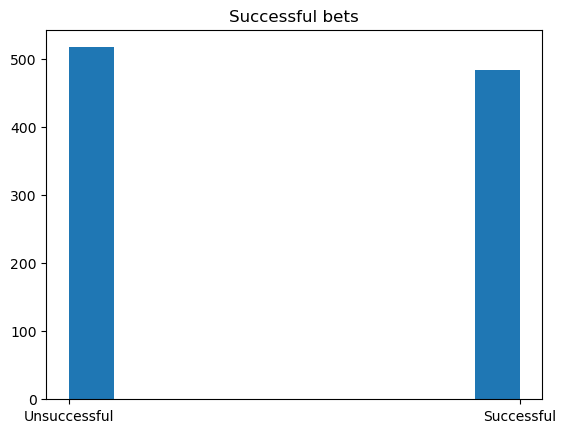

In [7]:
plot_successful_bets(money_histories[10], 10)

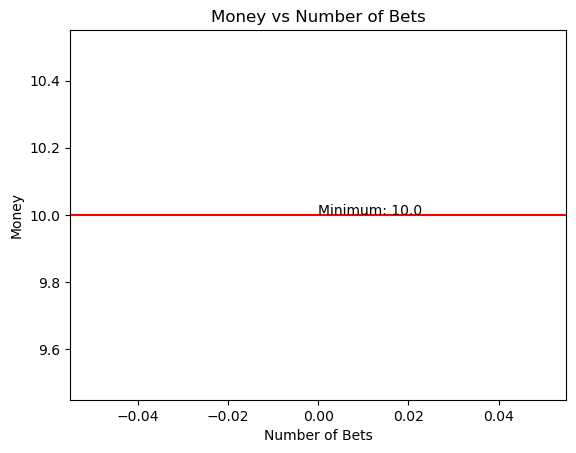

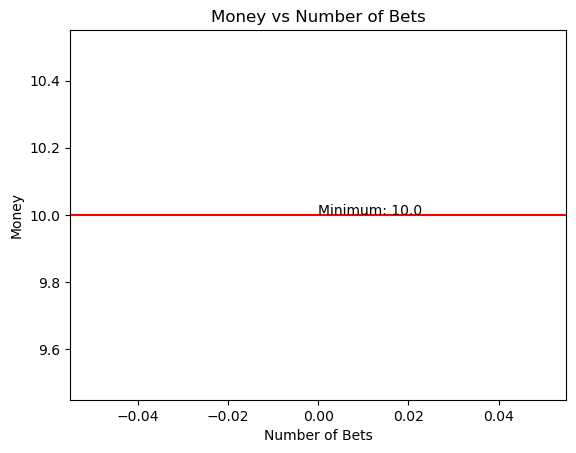

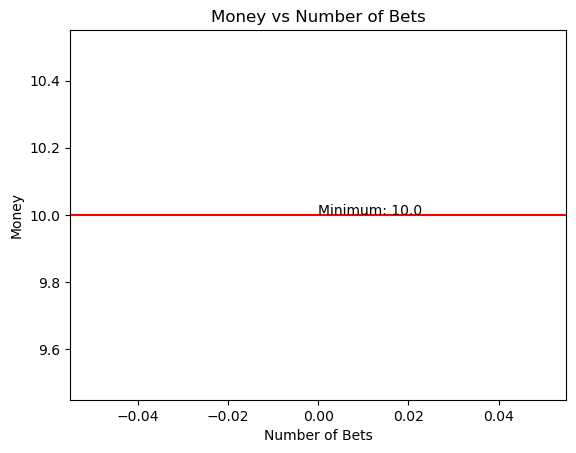

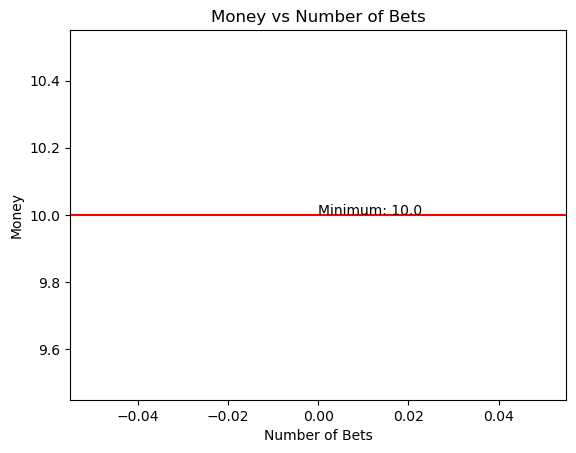

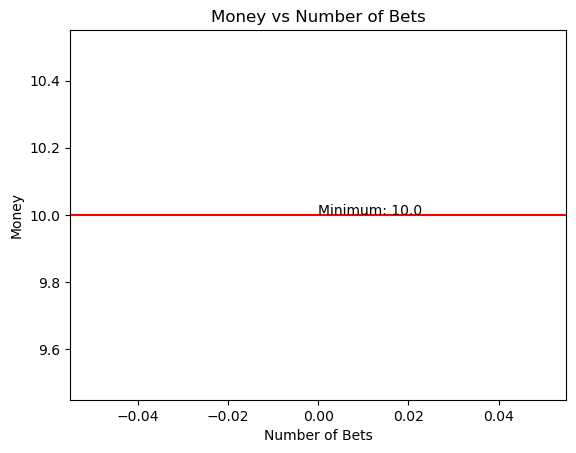

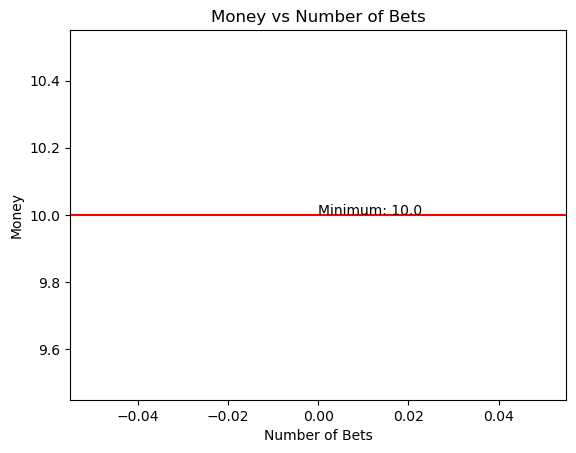

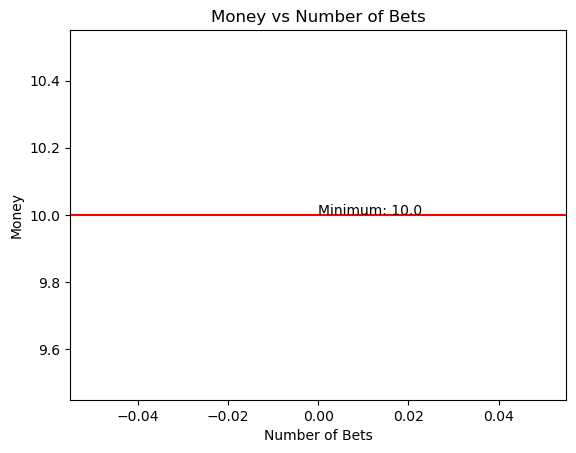

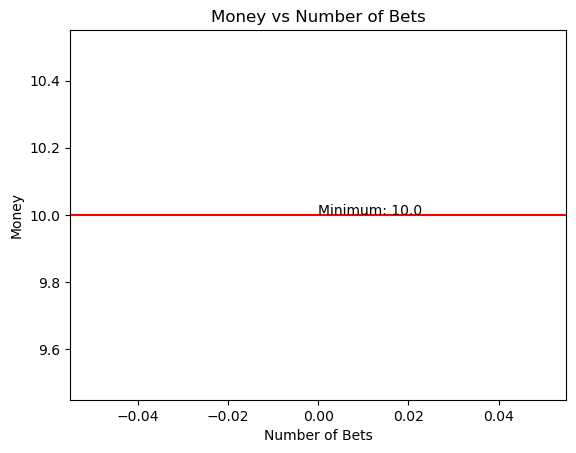

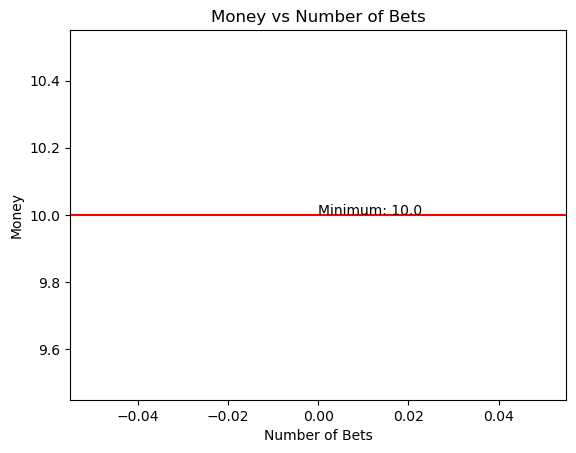

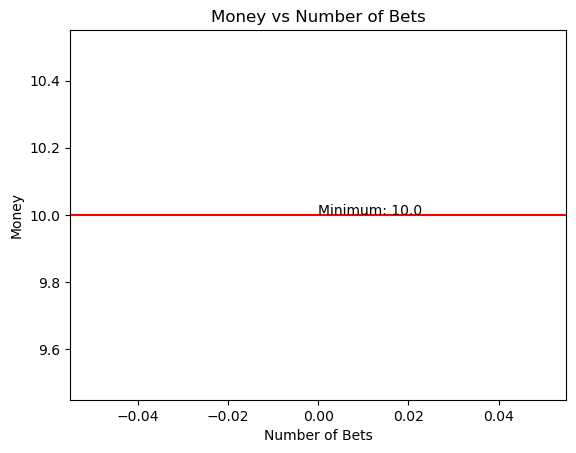

In [15]:
plot_money_histories(successful_histories, 10)

## Analysis when the goal is to win 100 units

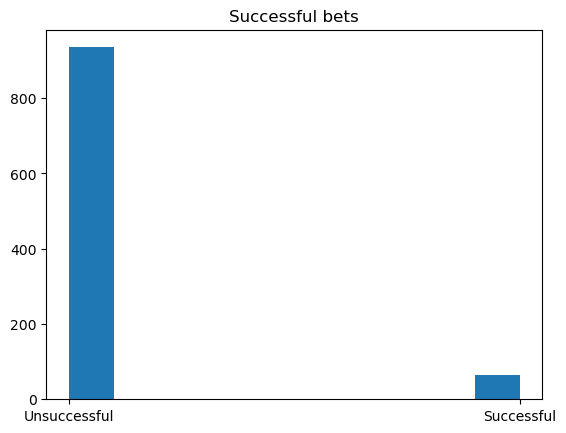

In [9]:
plot_successful_bets(money_histories[100], 100)

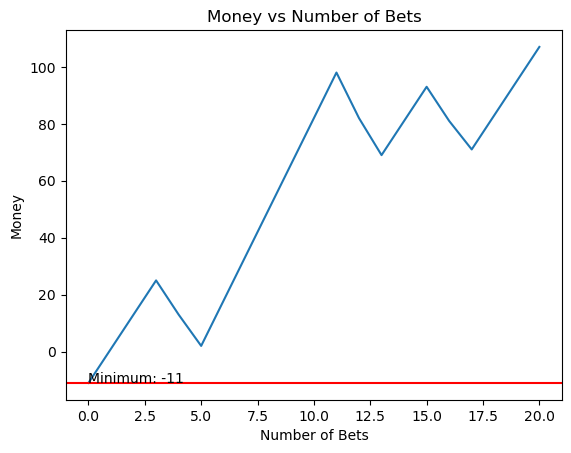

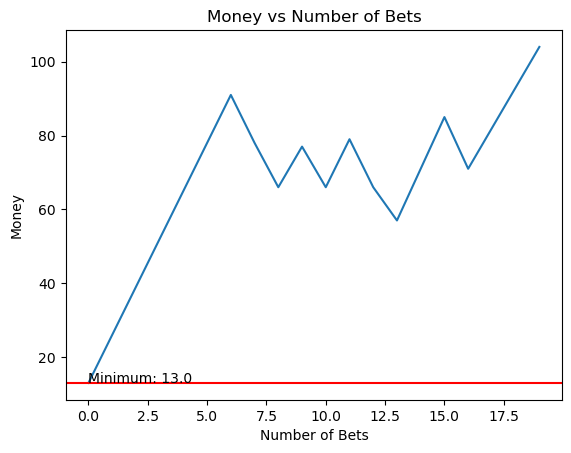

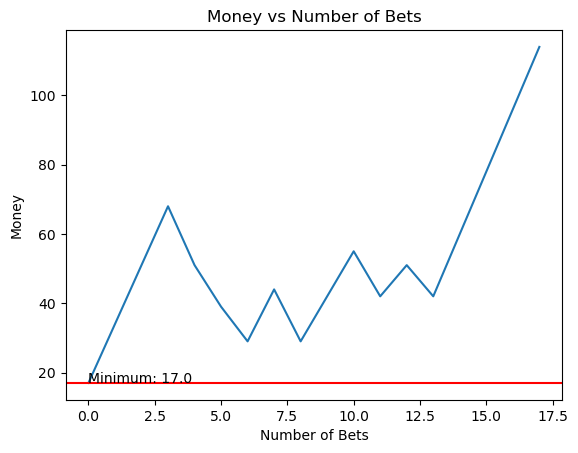

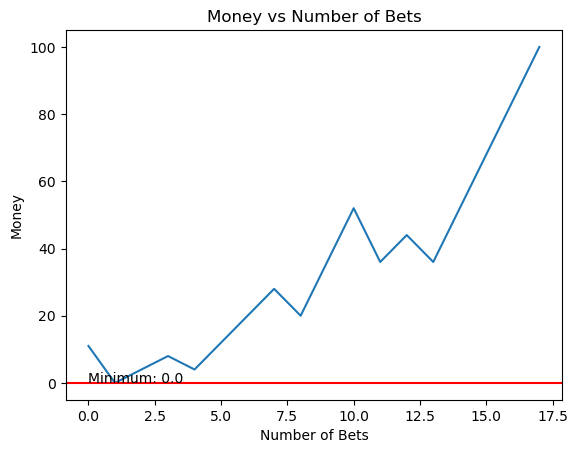

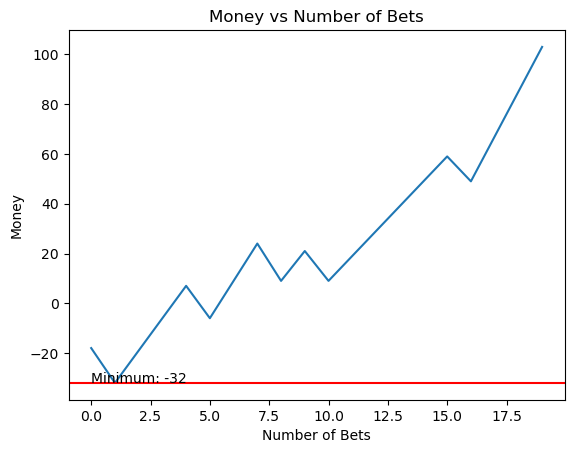

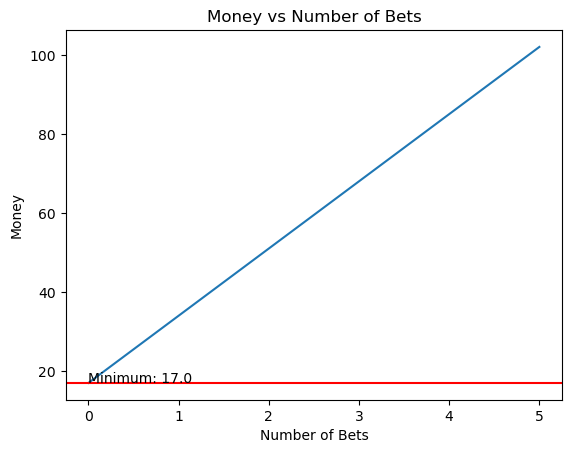

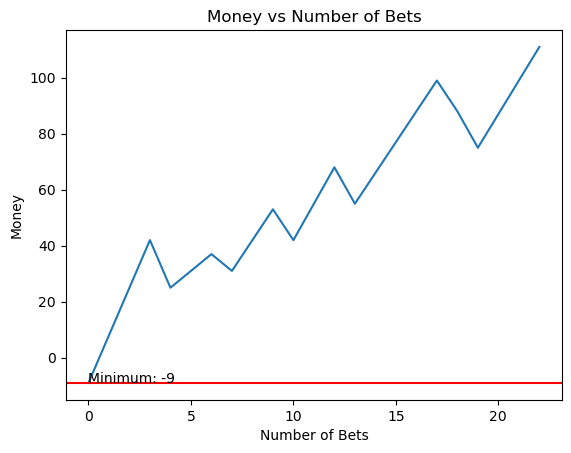

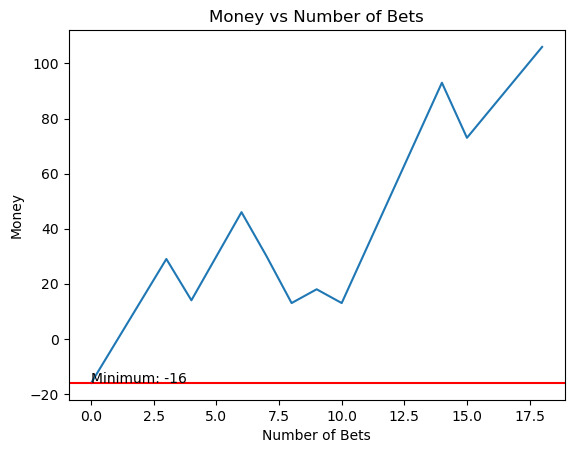

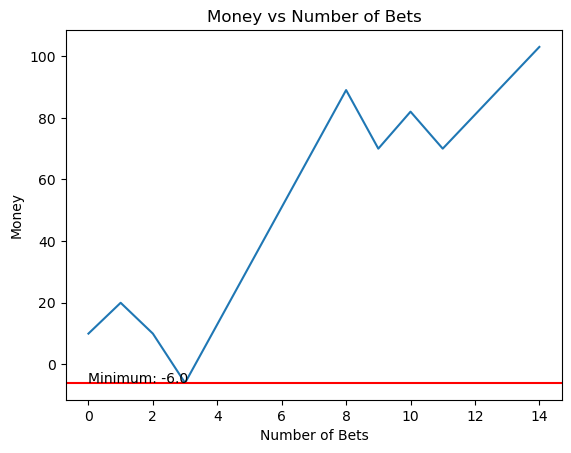

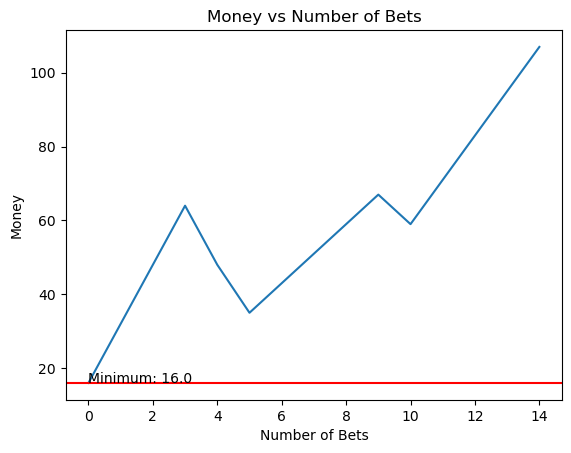

In [10]:
plot_money_histories(successful_histories, 100)

## Analysis when the goal is to win 500 units

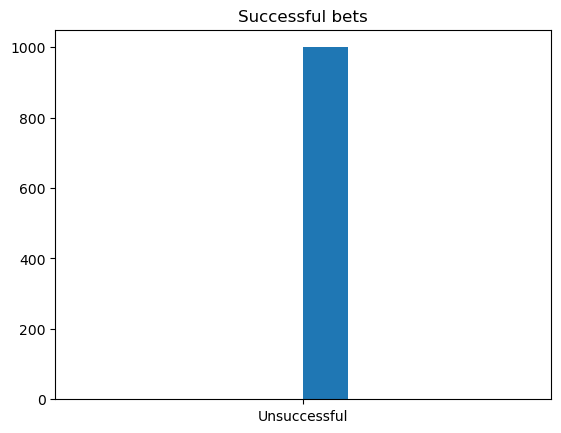

In [11]:
plot_successful_bets(money_histories[500], 500)

In [12]:
plot_money_histories(successful_histories, 500)

## Analysis when the goal is to win 1000 units

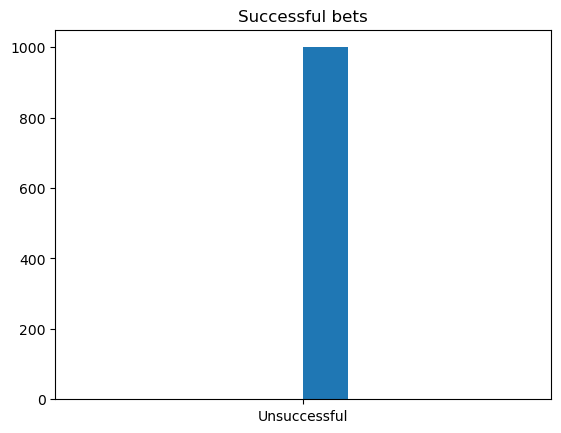

In [13]:
plot_successful_bets(money_histories[1000], 1000)

In [14]:
plot_money_histories(successful_histories, 500)